In [1]:
# import libraries

import kaleido
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio


# pio.renderers.default = "svg"

In [2]:
# import data

df_delay = pd.read_excel("get_around_delay_analysis.xlsx")
df_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [3]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [4]:
df_delay.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


mobile     17003
connect     4307
Name: checkin_type, dtype: int64


<AxesSubplot: xlabel='checkin_type', ylabel='count'>

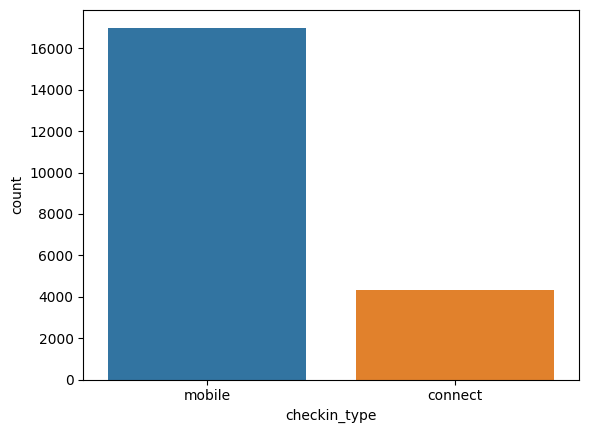

In [5]:
print(df_delay['checkin_type'].value_counts())
sns.countplot(x=df_delay['checkin_type'])

ended       18045
canceled     3265
Name: state, dtype: int64


<AxesSubplot: xlabel='state', ylabel='count'>

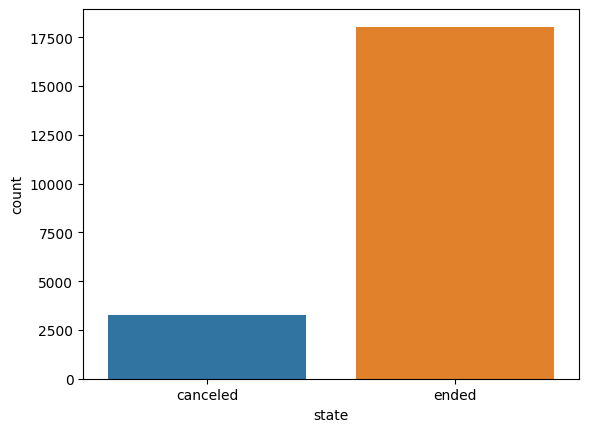

In [6]:
print(df_delay['state'].value_counts())
sns.countplot(data=df_delay, x='state')

ended       18045
canceled     3265
Name: state, dtype: int64


<AxesSubplot: xlabel='state', ylabel='count'>

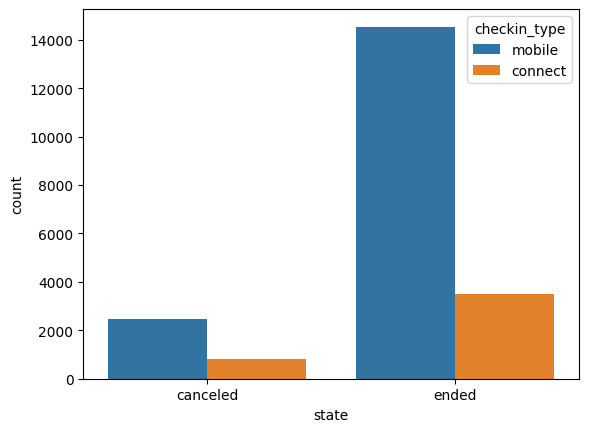

In [7]:
print(df_delay['state'].value_counts())
sns.countplot(data=df_delay, x='state', hue='checkin_type')

create a feature delay : yes or no
yes : delay_at_checkout_in_minutes >= 0

In [8]:
df_delay['delay'] = df_delay["delay_at_checkout_in_minutes"].apply(lambda x : "yes" if x > 0 else "no")

no     11784
yes     9526
Name: delay, dtype: int64
% no delay 0.5529798216799625
% yes delay 0.44702017832003754


<AxesSubplot: xlabel='delay', ylabel='count'>

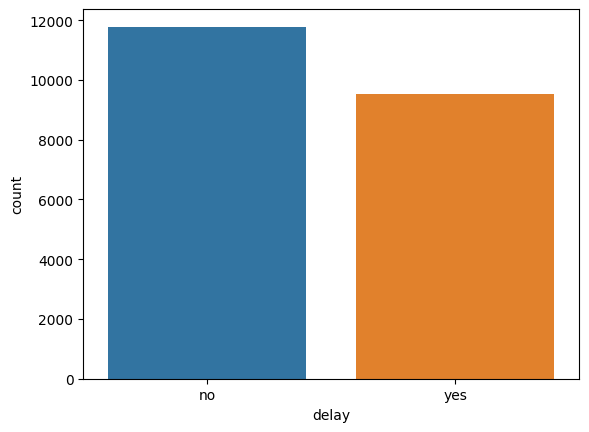

In [9]:
print(df_delay['delay'].value_counts())
print("% no delay", sum(df_delay['delay']=="no")/len(df_delay['delay']))
print("% yes delay",sum(df_delay['delay']=="yes")/len(df_delay['delay']))
sns.countplot(data=df_delay, x='delay')

In [10]:
fig = px.pie(df_delay, 'delay')
fig.show()

In [11]:
display(df_delay.groupby('delay')['checkin_type'].value_counts())

delay  checkin_type
no     mobile          8961
       connect         2823
yes    mobile          8042
       connect         1484
Name: checkin_type, dtype: int64

In [12]:
fig = px.histogram(df_delay, 
                    x = 'delay',
                    color = 'checkin_type',
                    facet_row = 'checkin_type',
                    histnorm = 'probability',
                    text_auto = '.2%',
                    title = '% delay by checkin type')
fig.show()

In [13]:
print(f'number of previous rental with delay lower than 12 hours : {sum(df_delay["previous_ended_rental_id"].notna())}')
round(100* sum(df_delay["previous_ended_rental_id"].notna())/len(df_delay), 2)

number of previous rental with delay lower than 12 hours : 1841


8.64

In [14]:
df_delay['delay_at_checkout_in_minutes'] = df_delay['delay_at_checkout_in_minutes'].apply(lambda x : x if x >0
else 0)

In [15]:
df_delay[df_delay["previous_ended_rental_id"].notna()]

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay
6,511639,370585,connect,ended,0.0,563782.0,570.0,no
19,519491,312389,mobile,ended,58.0,545639.0,420.0,yes
23,521156,392479,mobile,ended,0.0,537298.0,0.0,no
34,525044,349751,mobile,ended,0.0,510607.0,60.0,no
40,528808,181625,connect,ended,0.0,557404.0,330.0,no
...,...,...,...,...,...,...,...,...
21269,568049,381499,connect,canceled,0.0,562174.0,720.0,no
21272,568241,396409,mobile,canceled,0.0,566136.0,570.0,no
21275,568523,297973,mobile,ended,12.0,567121.0,240.0,yes
21286,569717,377312,mobile,ended,230.0,545045.0,90.0,yes


Join columns from df_delay and the delay_at_checkout_in_minutes of the previous rental

In [16]:
df_delay_new = df_delay.merge(df_delay[['rental_id','delay_at_checkout_in_minutes']], left_on='previous_ended_rental_id', right_on='rental_id', how='left')
df_delay_new

,rental_id_x,car_id,checkin_type,state,delay_at_checkout_in_minutes_x,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay,rental_id_y,delay_at_checkout_in_minutes_y
0,505000,363965,mobile,canceled,0.0,NaN,NaN,no,NaN,NaN
1,507750,269550,mobile,ended,0.0,NaN,NaN,no,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN,yes,NaN,NaN
3,508865,299063,connect,canceled,0.0,NaN,NaN,no,NaN,NaN
4,511440,313932,mobile,ended,0.0,NaN,NaN,no,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,0.0,573429.0,300.0,no,573429.0,0.0
21306,573790,341965,mobile,ended,0.0,NaN,NaN,no,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN,yes,NaN,NaN
21308,574852,362531,connect,ended,0.0,NaN,NaN,no,NaN,NaN


In [17]:
# keeps only the delays and sets the other values to 0
df_delay_new['delay_at_checkout_in_minutes'] = df_delay_new['delay_at_checkout_in_minutes_x'].apply(lambda x : x if x >0
else 0)
# keeps only the delays and sets the other values to o
df_delay_new['delay_at_checkout_with_previous_rental'] = df_delay_new['delay_at_checkout_in_minutes_y'].apply(lambda x : x if x >0
else 0)
# calculate the delay at checkin
df_delay_new['delay_at_checkin_in_minutes'] = df_delay_new['delay_at_checkout_with_previous_rental'] - df_delay_new['time_delta_with_previous_rental_in_minutes']
df_delay_new['delay_at_checkin_in_minutes'] = df_delay_new['delay_at_checkin_in_minutes'].apply(lambda x : x if x >0 else 0)
# create a booleen feature : delay_checkin yes or no
df_delay_new['delay_checkin'] = df_delay_new['delay_at_checkin_in_minutes'].apply(lambda x : "yes" if x >0
else "no")
# drop the old columns
df_delay_new.drop(columns=['delay_at_checkout_in_minutes_y','delay_at_checkout_in_minutes_x','rental_id_y' ], inplace = True)

In [18]:
df_delay_new['delay_checkin'].value_counts()

False    21092
True       218
Name: delay_checkin, dtype: int64

In [19]:
df_delay_new[df_delay_new['delay_checkin']==True]

,rental_id_x,car_id,checkin_type,state,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay,delay_at_checkout_in_minutes,delay_at_checkout_with_previous_rental,delay_at_checkin_in_minutes,delay_checkin
148,540479,374684,mobile,ended,539751.0,0.0,yes,12.0,3.0,3.0,True
164,541862,382364,mobile,ended,540607.0,0.0,yes,125.0,1.0,1.0,True
438,559781,408776,mobile,ended,540868.0,0.0,yes,44.0,26.0,26.0,True
735,574568,301512,mobile,ended,572909.0,0.0,yes,110.0,13.0,13.0,True
844,535519,353425,connect,ended,533413.0,0.0,no,0.0,4.0,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...
20918,561206,312603,connect,ended,554958.0,30.0,yes,10.0,183.0,153.0,True
20924,561476,410402,mobile,ended,550186.0,0.0,yes,11.0,21.0,21.0,True
21021,560740,383344,connect,ended,534678.0,60.0,yes,17.0,164.0,104.0,True
21169,566008,378689,mobile,canceled,564756.0,0.0,no,0.0,39.0,39.0,True


In [20]:
fig = px.histogram(df_delay_new[df_delay_new['delay_checkin']==True],
                    x = "state",
                    color = 'state',
                    text_auto = '.0f',
                    )
fig.show()

In [21]:
fig = px.histogram(df_delay_new, 
                    x = "state",
                    color = 'delay_checkin',
                    facet_row = 'delay_checkin',
                    histnorm = 'probability',
                    text_auto = '.2%',
                    title = ' % state by checkin type')
fig.show()

In [22]:
fig = px.histogram(df_delay_new,
                    x ='delay_at_checkout_in_minutes',
                    range_x = [0,720],
                    nbins=7200
                    )
fig.show()